In [82]:
import numpy as np
import underworld as uw
from underworld import function as fn
import glucifer
import operator


In [83]:
#If run through Docker we'll point at the local 'unsupported dir.'
#On hpc, the path should also include a directory holding the unsupported_dan.
import os
import sys

if os.getcwd() == '/workspace/newSlab':
    sys.path.append('../unsupported')

#this does't actually need to be protected. More a reminder it's an interim measure
try:
    sys.path.append('../../../unsupported')
except:
    pass

#%load_ext autoreload
from unsupported_dan.interfaces.interface2D import interface2D, interface_collection

from unsupported_dan.interfaces.smoothing2D import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
minX = -1.0
maxX = 1.0
resX = 12
resY = 12
elementType="Q1/dQ0"

mesh = uw.mesh.FeMesh_Cartesian( elementType = (elementType), 
                                 elementRes  = ( resX, resY), 
                                 minCoord    = ( minX, -1.0), 
                                 maxCoord    = ( maxX, 1.0),
                                 periodic    = [False, False]  ) 


velocityField    = uw.mesh.MeshVariable( mesh=mesh,         nodeDofCount=mesh.dim )

velocityField.data[:] = [0.,0.]


In [85]:
N = 51
xs = np.linspace(-1., 1, N)*0.9 - 0.01
ys = np.linspace(-1., 1, N)*0.9 + 0.01

In [86]:
line1 = interface2D(mesh, velocityField, xs, ys, 
                        0, 1, insidePt=(0.,-1.))



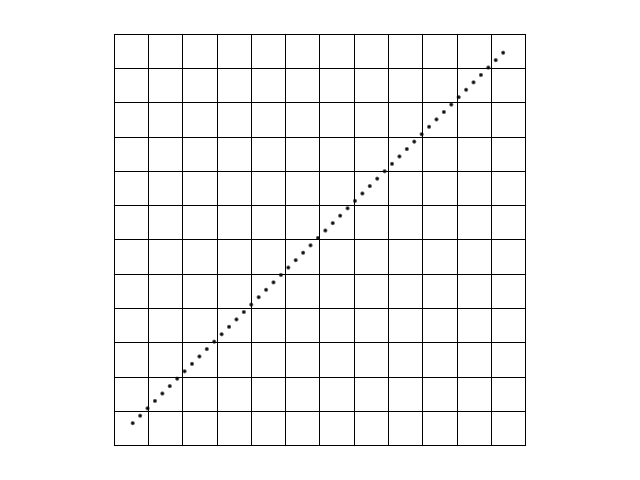

In [87]:
fig1 = glucifer.Figure()
fig1.append( glucifer.objects.Mesh(mesh))
fig1.append( glucifer.objects.Points(line1.swarm, pointsize = 5))

fig1.show()

In [101]:
print(uw.rank(), line1.swarm.particleGlobalCount)

(0, 100)


In [104]:
print('hello from rank {}, with {} local particles, and {} global particles'.format(uw.rank(), 
                                                                                    line1.swarm.particleLocalCount, 
                                                                                    line1.swarm.particleGlobalCount))

hello from rank 0, with 100 local particles, and 100 global particles


In [90]:
ds = 0.5*(2.*(np.sqrt(2)*0.9))/N

In [95]:
repair_interface2D(line1, ds, k=8)

In [ ]:
print('hello again from rank {}, with {} local particles, and {} global particles'.format(uw.rank(), 
                                                                                    line1.swarm.particleLocalCount, 
                                                                                    line1.swarm.particleGlobalCount))